## Visão Computacional: Como implementar Redes Neurais Convolucionais (CNNs) para classificação de imagens com TensorFlow

In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Importar bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
# Carregar dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
# Normalizar os valores de pixel (0 a 1)
# 255 é o valor máximo de pixel em imagens RGB
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Definir o modelo CNN
model = keras.Sequential([
# Primeira camada convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
# Segunda camada convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
# Terceira camada convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Achatar e conectar à camada totalmente conectada
    layers.Flatten(),
    # Camada densa faz o processo de classificação
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Saída com 10 classes
])
# Exibir resumo do modelo
model.summary()

c:\Users\Gustavo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3556 - loss: 1.7473 - val_accuracy: 0.5258 - val_loss: 1.3031
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5788 - loss: 1.1922 - val_accuracy: 0.6211 - val_loss: 1.0609
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6400 - loss: 1.0153 - val_accuracy: 0.6573 - val_loss: 0.9820
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6810 - loss: 0.9073 - val_accuracy: 0.6869 - val_loss: 0.8998
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7114 - loss: 0.8210 - val_accuracy: 0.6877 - val_loss: 0.9077
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7345 - loss: 0.7577 - val_accuracy: 0.7010 - val_loss: 0.8874
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7574 - loss: 0.6933 - val_accuracy: 0.7026 - val_loss: 0.8564
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7767 - 

In [9]:
# Plotar a acurácia de treinamento e validação
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Acurácia no conjunto de teste: {test_acc:.2f}')

313/313 - 1s - 3ms/step - accuracy: 0.7118 - loss: 0.8850
Acurácia no conjunto de teste: 0.71


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


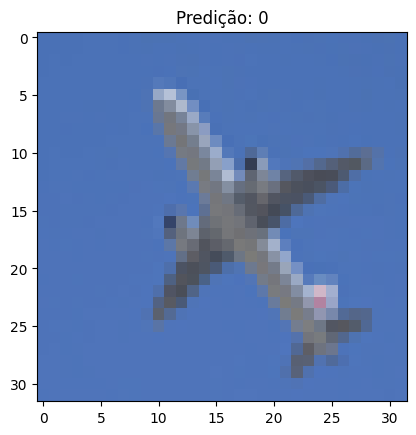

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Caminho da sua imagem
caminho_imagem = r"..\img\aviao.jpg"

# Carregar e redimensionar para 32x32 pixels
img = Image.open(caminho_imagem).resize((32, 32))
img_array = np.array(img)

# Se a imagem não tiver 3 canais, converta para RGB
if img_array.shape[-1] != 3:
    img = img.convert('RGB')
    img_array = np.array(img)

# Normalizar os pixels
img_array = img_array / 255.0

# Ajustar formato para o modelo (1, 32, 32, 3)
# 1 é o tamanho do batch, 32x32 é a dimensão da imagem e 3 é o número de canais (RGB)
img_array = np.expand_dims(img_array, axis=0)

# Fazer previsão
pred = model.predict(img_array)
classe = np.argmax(pred)

# Mostrar imagem e classe prevista
plt.imshow(np.squeeze(img_array))
plt.title(f'Predição: {classe}')
plt.show()